## Task 4.9 - Part 2

## Contents
#### 1. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.
#### 2. Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
#### 3. Create a bar chart from the “loyalty_flag” column.
#### 4. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
#### 5. Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.
#### 6. Explore whether there’s a connection between age and spending power (income). 
#### 7. Export visualizations. 

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create path
path = r'/Users/anfran/Documents/Instacart Basket Analysis'

In [3]:
#Import New Dataframe
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_combined.pkl'))

In [4]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,registration_date,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,9999999.0,196.0,1.0,0.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
ords_prods_cust_merge.shape

(32404859, 32)

#### Question 2 - If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

#### *Please see 'Exercise 4.9 Intro to Data Visualizations with Python.ipynb'

#### Question 3 - You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0.5, 1.0, 'Instacart Orders by Hour of Day')

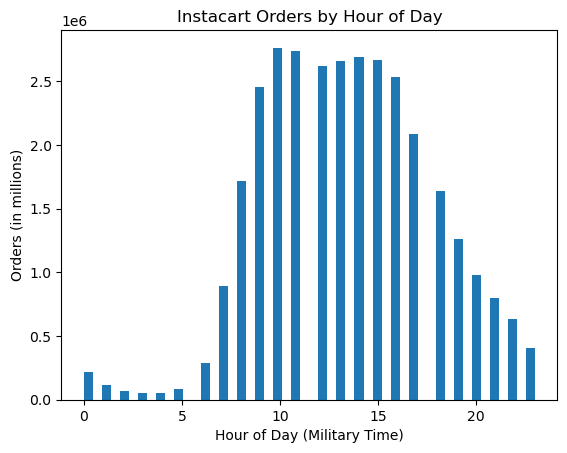

In [12]:
#Create histogram for 'order_hour_of_day'
hist = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 50)
plt.ylabel("Orders (in millions)")
plt.xlabel("Hour of Day (Military Time)")
plt.title ("Instacart Orders by Hour of Day")


In [13]:
#Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_new.png'))

The histogram shows that the majority of orders occur between 09:00 and 16:00

#### Question 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

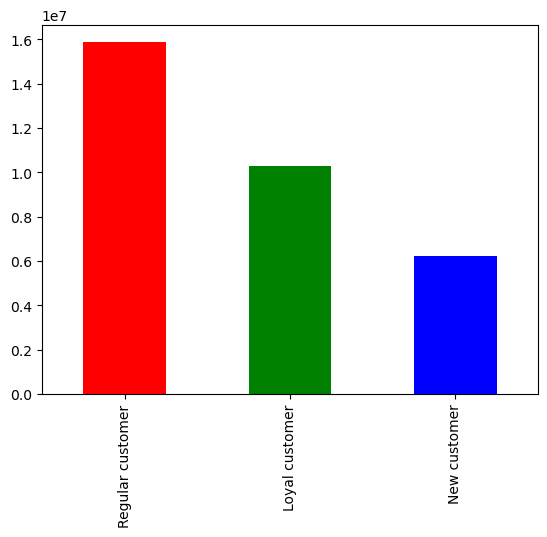

In [12]:
#Create bar chart for 'loyalty_flag'
loyalty = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(color = ['red', 'green', 'blue'])

In [13]:
#Export bar chart
loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

#### Question 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [14]:
#Create randomized 70/30 sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [17]:
#Store 70% of the sample in the dataframe big
big = ords_prods_cust_merge[dev]

In [18]:
#Store 30% of the sample in the dataframe small
small = ords_prods_cust_merge[~dev]

In [19]:
#Check results
len(ords_prods_cust_merge)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
#Reduce samples to only those columns necessary for the chart
df_2 = small[['order_hour_of_day','prices']]

In [22]:
df_2.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int64  
 1   prices             float64
dtypes: float64(1), int64(1)
memory usage: 222.5 MB


Text(0.5, 1.0, 'Average Price of Product Purchased')

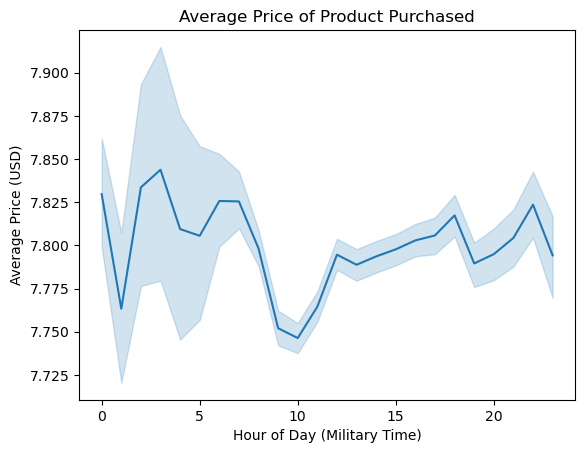

In [24]:
#Create line chart 
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.ylabel("Average Price (USD)")
plt.xlabel("Hour of Day (Military Time)")
plt.title ("Average Price of Product Purchased")


In [30]:
#Export Line Chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order_hour_of_day_new.png'))

#### Question 6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

In [26]:
#Reduce samples to only those columns necessary for the chart
df_3 = small[['age','number_of_dependants']]

In [27]:
#Check results
df_3.head()

,age,number_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


In [28]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column                Dtype
---  ------                -----
 0   age                   int64
 1   number_of_dependants  int64
dtypes: int64(2)
memory usage: 480.5 MB


Text(0.5, 1.0, 'Number of Dependents by Customer Age')

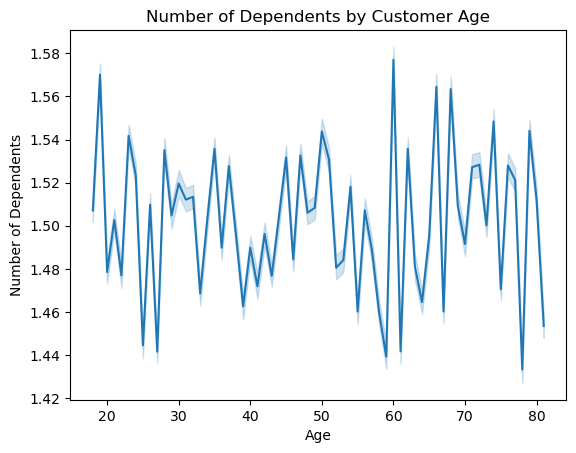

In [29]:
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependants')
plt.ylabel("Number of Dependents")
plt.xlabel("Age")
plt.title ("Number of Dependents by Customer Age")

This chart shows a high and low number of dependents in each age group. I'm not sure there is much that can be used here, other than that age 60 has the highest average number of dependents. 

In [31]:
#Export line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_number_of_dependants.png'))

#### Question 7 - You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [32]:
#Reduce samples to only those columns necessary for the chart
df_4 = small[['age','income']]

In [33]:
#Check results
df_4.head()

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


In [34]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   age     int64
 1   income  int64
dtypes: int64(2)
memory usage: 480.5 MB


Text(0.5, 1.0, 'Total Income by Customer Age')

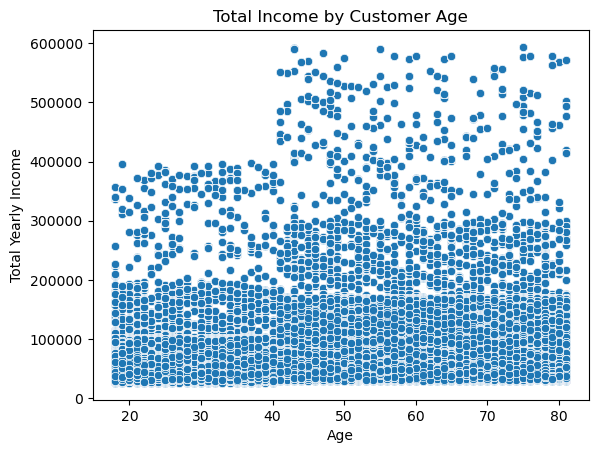

In [35]:
#Create scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df_4)
plt.ylabel("Total Yearly Income")
plt.xlabel("Age")
plt.title ("Total Income by Customer Age")

The scatterplat shows that the lower-income customers are equally spread between age groups. The upper-income customers begin at age 40+. This would mean that those age 40+ have greater spending power on average. 

In [36]:
#Export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

#### Question 8 - Export your visualizations as “.png” files in your relevant project folder.

Please see above

In [44]:
#Export ords_prods_cust_merge to pickle
ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_combined_updated_4.9.pkl'))